In [1]:
import matplotlib.pyplot as plt
import glob
from plot import parse_experiment_result, plot_preemption_stats

In [9]:
diff_interval_test_result = glob.glob("../diff_workloads/*")
print(diff_interval_test_result) 
diff_interval_test_result.sort()

preemption_stats = [parse_experiment_result(file) for file in diff_interval_test_result]

result_per_range_ratio: dict[float, list] = {}
for item in preemption_stats:
    if item.range_query_ratio in result_per_range_ratio.keys():
        result_per_range_ratio[item.range_query_ratio].append(item)
    else:
        result_per_range_ratio[item.range_query_ratio] = [item] 
# print(result_per_range_ratio)

['../diff_workloads/ghost_0.005.out.done', '../diff_workloads/ghost_0.125.out.done', '../diff_workloads/cfs_0.175.out.done', '../diff_workloads/ghost_0.05.out.done', '../diff_workloads/cfs_0.025.out.done', '../diff_workloads/ghost_0.075.out.done', '../diff_workloads/ghost_0.1.out.done', '../diff_workloads/cfs_0.1.out.done', '../diff_workloads/ghost_0.15.out.done', '../diff_workloads/ghost_0.025.out.done', '../diff_workloads/cfs_0.075.out.done', '../diff_workloads/cfs_0.15.out.done', '../diff_workloads/ghost_0.5.out.done', '../diff_workloads/ghost_0.4.out.done', '../diff_workloads/cfs_0.5.out.done', '../diff_workloads/cfs_0.4.out.done', '../diff_workloads/cfs_0.125.out.done', '../diff_workloads/ghost_0.175.out.done', '../diff_workloads/cfs_0.05.out.done', '../diff_workloads/ghost_0.2.out.done', '../diff_workloads/ghost_0.3.out.done', '../diff_workloads/cfs_0.2.out.done', '../diff_workloads/cfs_0.3.out.done', '../diff_workloads/cfs_0.005.out.done']


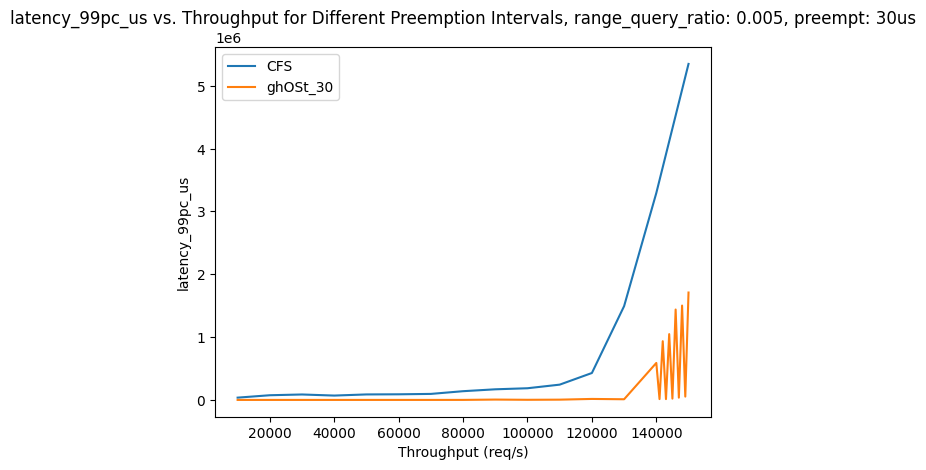

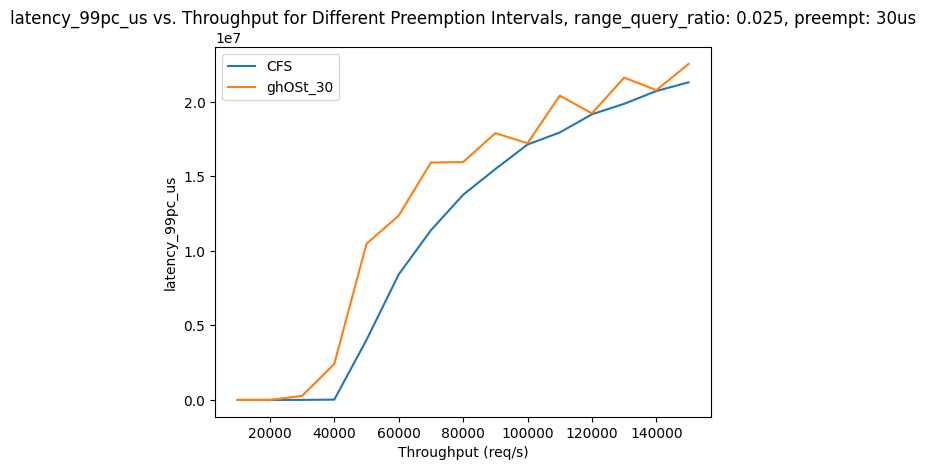

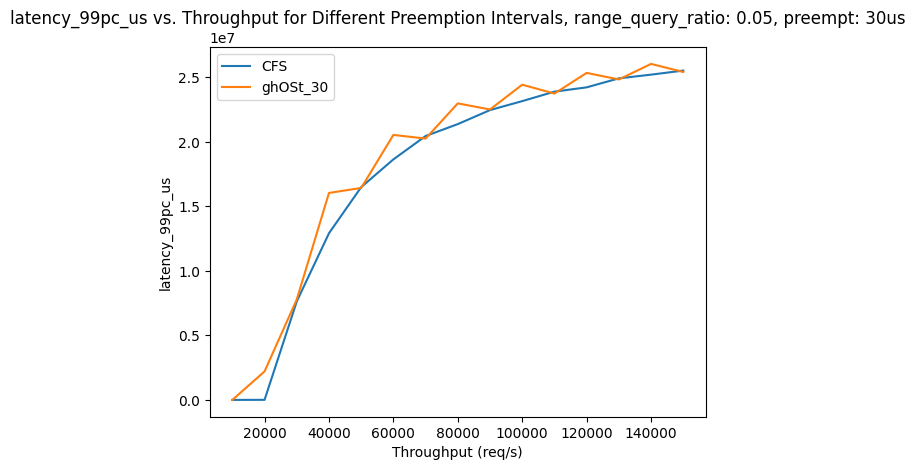

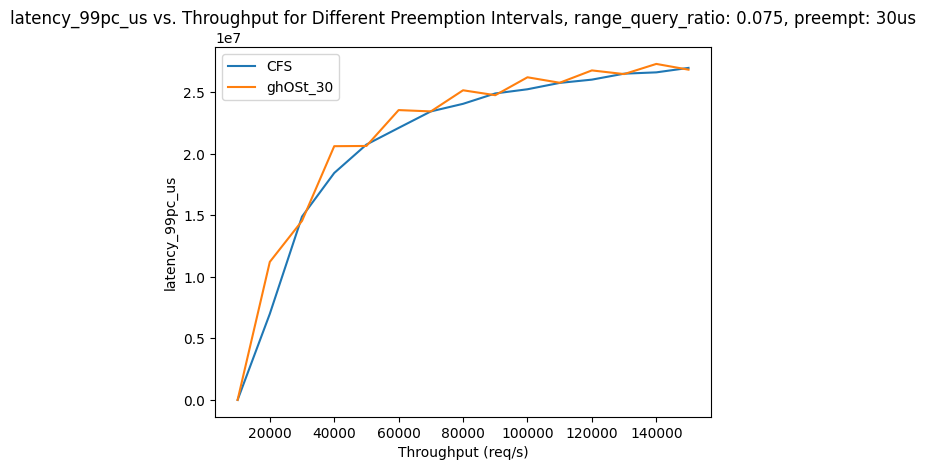

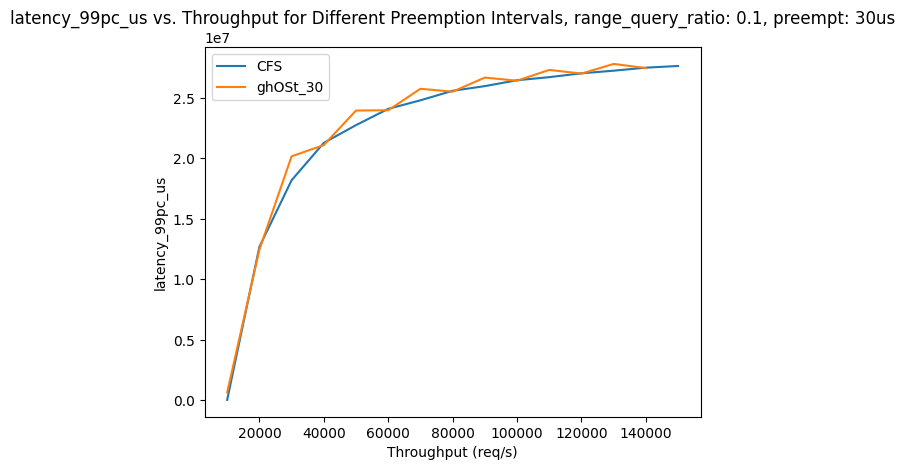

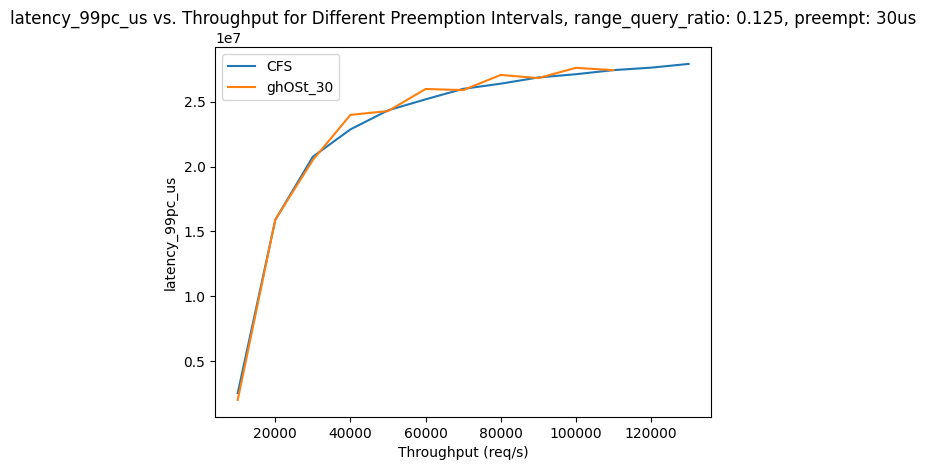

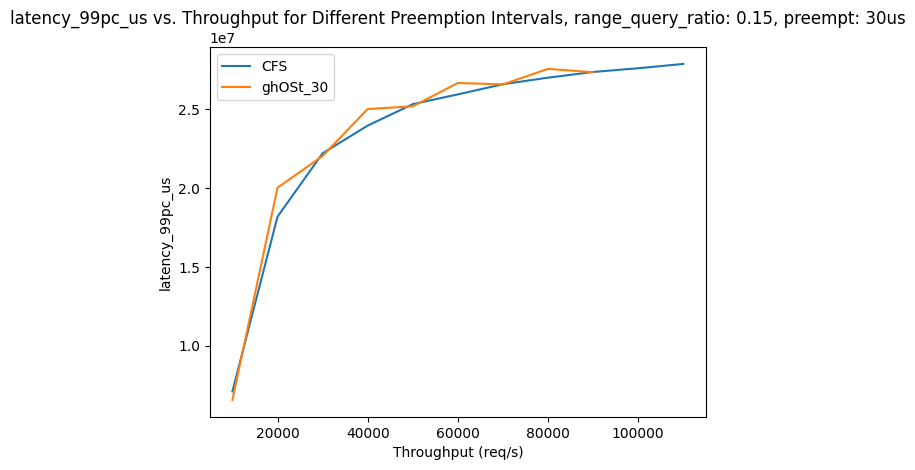

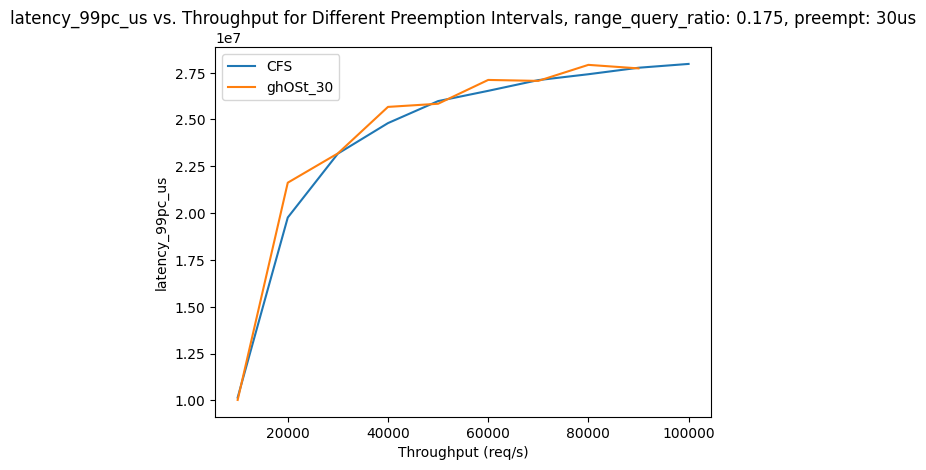

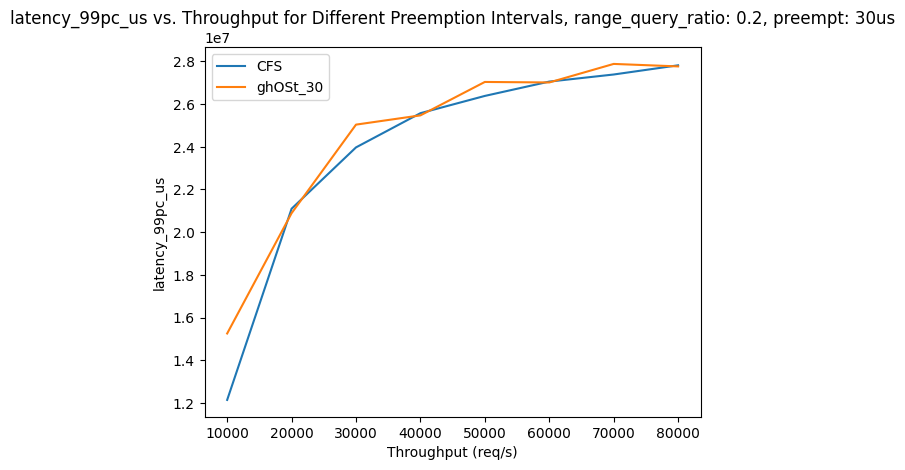

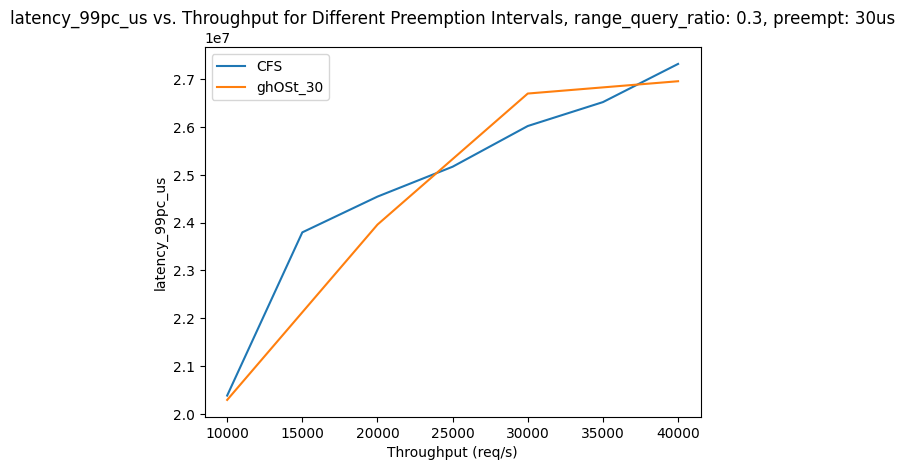

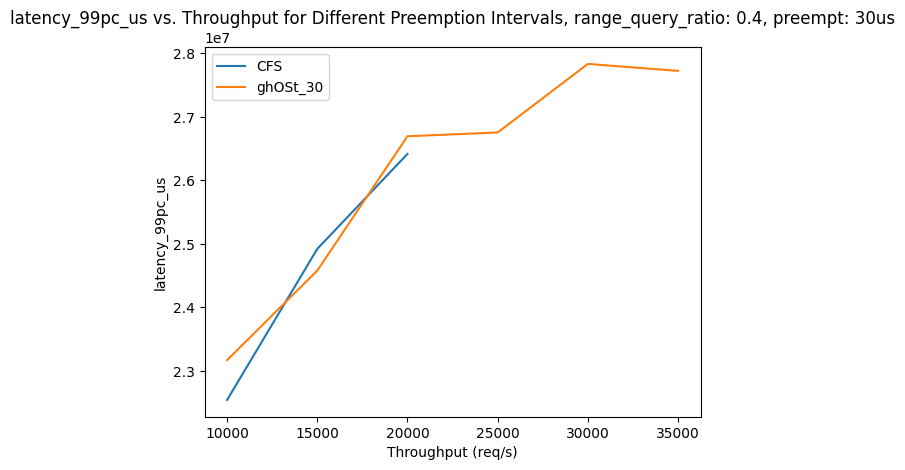

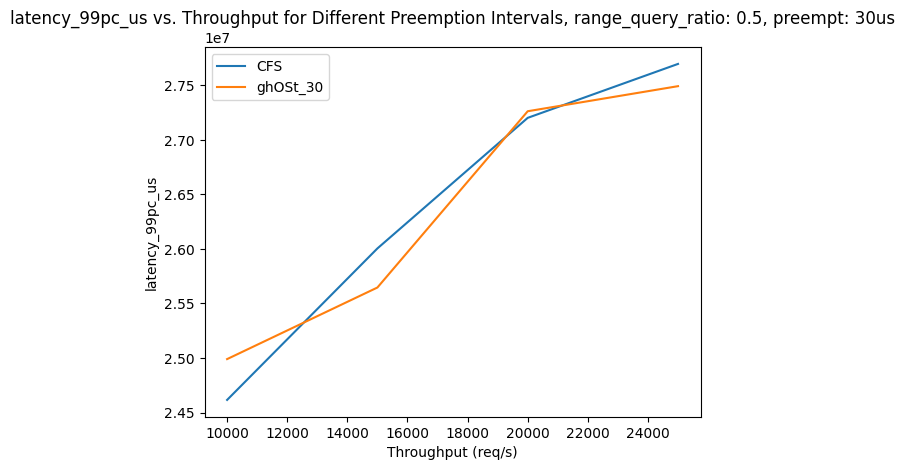

In [10]:
for key, val in result_per_range_ratio.items():
    plot_preemption_stats(val, key="latency_99pc_us")

In [10]:
diff_preemption_slice = glob.glob("../diff_preemption_results/*")
print(diff_preemption_slice) 
diff_preemption_slice.sort()

preemption_stats = [parse_experiment_result(file) for file in diff_preemption_slice]

diff_preemption_per_range_ratio: dict[float, list] = {}
for item in preemption_stats:
    if item.range_query_ratio in diff_preemption_per_range_ratio.keys():
        # if item.preemption_interval_us == None or item.preemption_interval_us % 10 == 0:
        diff_preemption_per_range_ratio[item.range_query_ratio].append(item)
    else:
        diff_preemption_per_range_ratio[item.range_query_ratio] = [item] 
# print(diff_preemption_per_range_ratio)

for key, val in diff_preemption_per_range_ratio.items():
    print(key, ":")
    for item in val: 
        print(item.scheduler, item.preemption_interval_us)

['../diff_preemption_results/ghost_0.025_50us.out', '../diff_preemption_results/ghost_0.09_65us.out', '../diff_preemption_results/ghost_0.08_65us.out', '../diff_preemption_results/ghost_0.07_50us.out', '../diff_preemption_results/cfs_0.1.out', '../diff_preemption_results/ghost_0.1.out', '../diff_preemption_results/ghost_0.1_65us.out', '../diff_preemption_results/ghost_0.05_40us.out', '../diff_preemption_results/ghost_0.025_35us.out', '../diff_preemption_results/ghost_0.07_35us.out', '../diff_preemption_results/ghost_0.1_60us.out', '../diff_preemption_results/ghost_0.05_45us.out', '../diff_preemption_results/ghost_0.08_80us.out', '../diff_preemption_results/ghost_0.09_80us.out', '../diff_preemption_results/ghost_0.07_30us.out', '../diff_preemption_results/ghost_0.025_30us.out', '../diff_preemption_results/cfs_0.05.out', '../diff_preemption_results/ghost_0.09_60us.out', '../diff_preemption_results/ghost_0.08_60us.out', '../diff_preemption_results/cfs_0.025.out.done', '../diff_preemption_

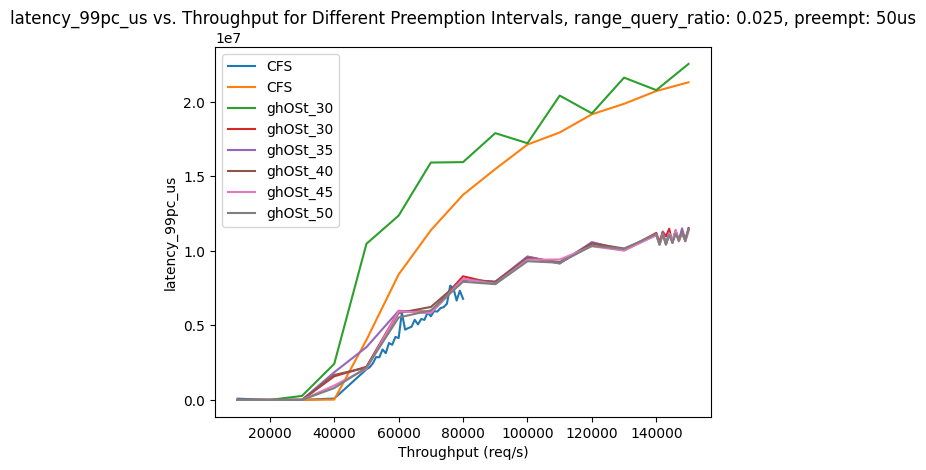

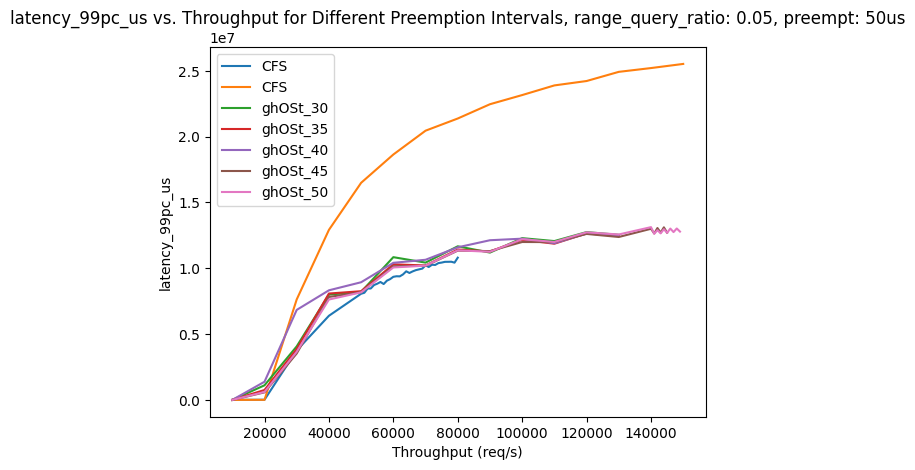

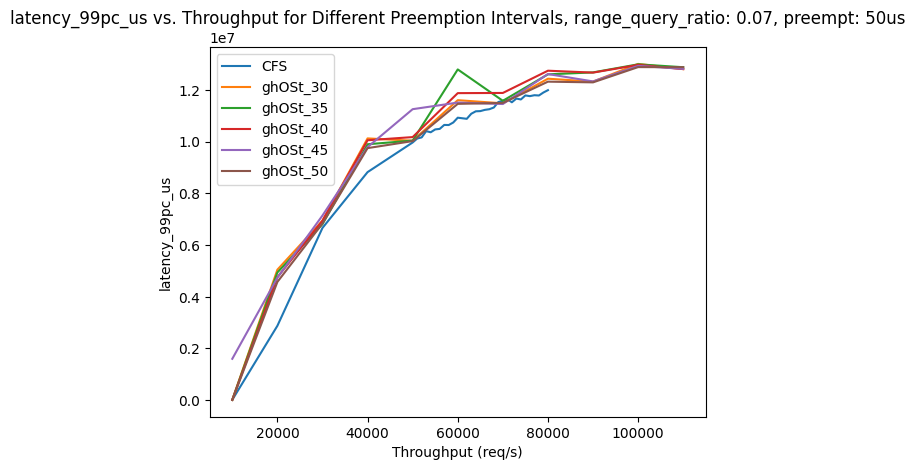

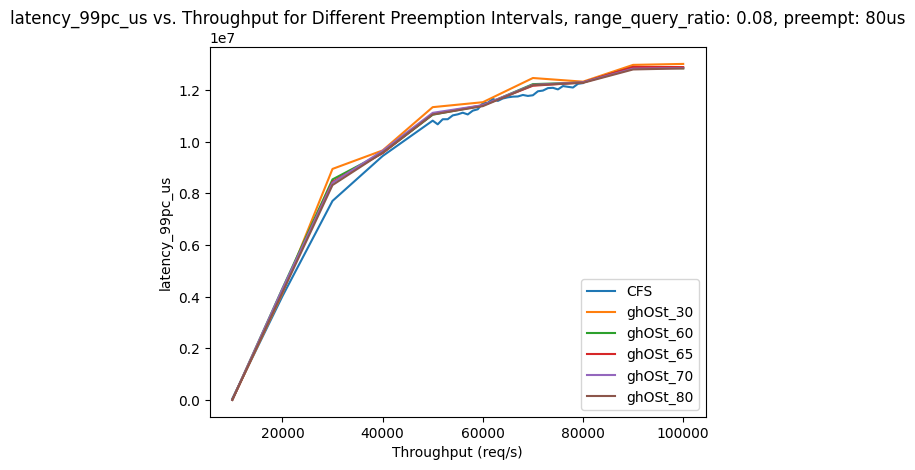

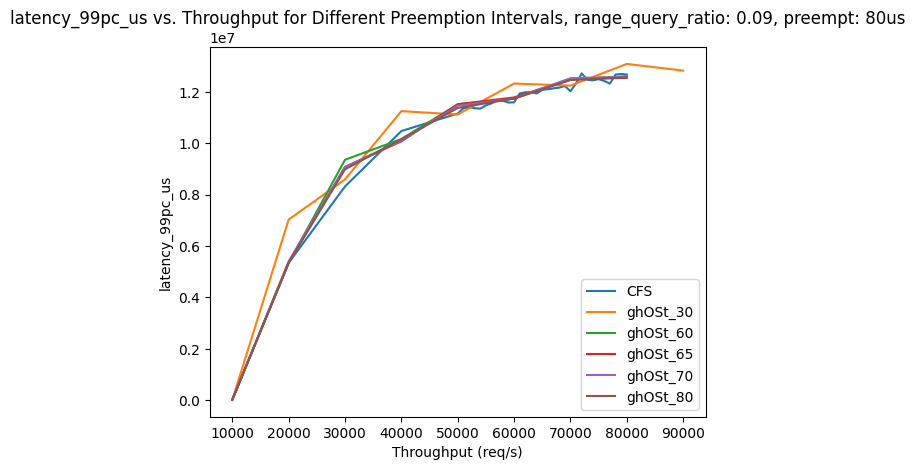

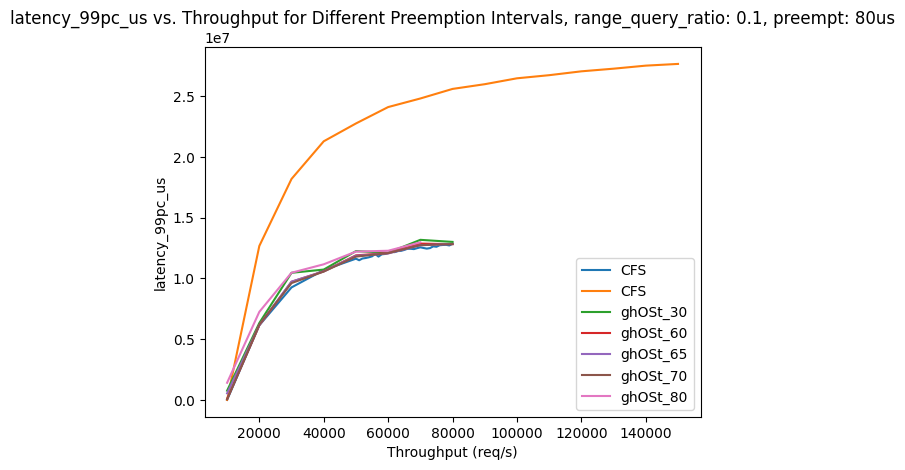

In [11]:
for key, val in diff_preemption_per_range_ratio.items():
    plot_preemption_stats(val, key="latency_99pc_us") # latency_99pc_us latency_99_9pc_us

In [19]:
diff_wkld_slice = glob.glob("../diff_wkld_slice/*")
print(diff_wkld_slice) 
diff_wkld_slice.sort()

diff_wkld_slice_res = [parse_experiment_result(file) for file in diff_wkld_slice]

diff_wkld_dict: dict[float, list] = {}
for item in diff_wkld_slice_res:
    if item.range_query_ratio in diff_wkld_dict.keys():
        # if item.preemption_interval_us == None or item.preemption_interval_us % 10 == 0:
        diff_wkld_dict[item.range_query_ratio].append(item)
    else:
        diff_wkld_dict[item.range_query_ratio] = [item] 
# print(diff_preemption_per_range_ratio)

for key, val in diff_wkld_dict.items():
    print(key, ":")
    for item in val: 
        print(item.scheduler, item.preemption_interval_us)

['../diff_wkld_slice/ghost_0.040_480us.out.done', '../diff_wkld_slice/ghost_0.040_240us.out.done', '../diff_wkld_slice/ghost_0.005_30us.out.done', '../diff_wkld_slice/ghost_0.020_240us.out.done', '../diff_wkld_slice/ghost_0.020_480us.out.done', '../diff_wkld_slice/ghost_0.005_60us.out.done', '../diff_wkld_slice/cfs_0.010.out.done', '../diff_wkld_slice/ghost_0.005_120us.out.done', '../diff_wkld_slice/ghost_0.010_120us.out.done', '../diff_wkld_slice/ghost_0.040_120us.out.done', '../diff_wkld_slice/ghost_0.010_30us.out.done', '../diff_wkld_slice/cfs_0.040.out.done', '../diff_wkld_slice/cfs_0.020.out.done', '../diff_wkld_slice/ghost_0.010_60us.out.done', '../diff_wkld_slice/ghost_0.020_30us.out.done', '../diff_wkld_slice/ghost_0.020_120us.out.done', '../diff_wkld_slice/ghost_0.040_60us.out.done', '../diff_wkld_slice/ghost_0.05_30us.out', '../diff_wkld_slice/ghost_0.040_30us.out.done', '../diff_wkld_slice/cfs_0.005.out.done', '../diff_wkld_slice/ghost_0.005_480us.out.done', '../diff_wkld_sl

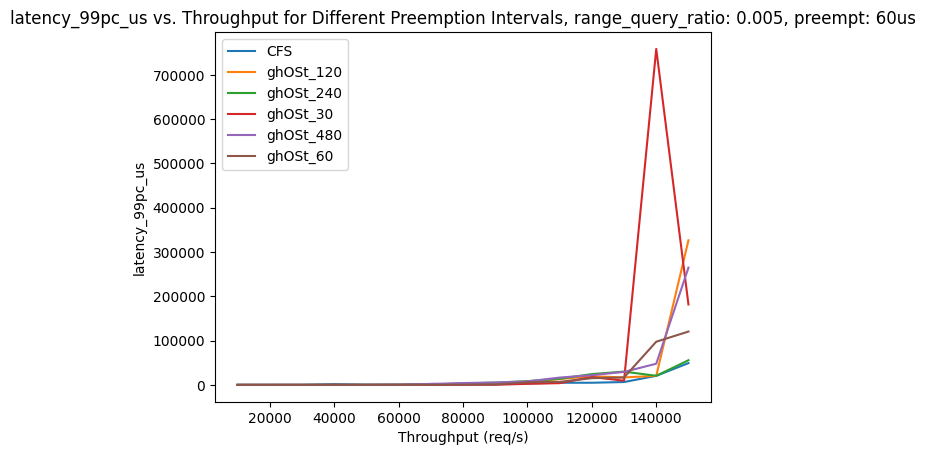

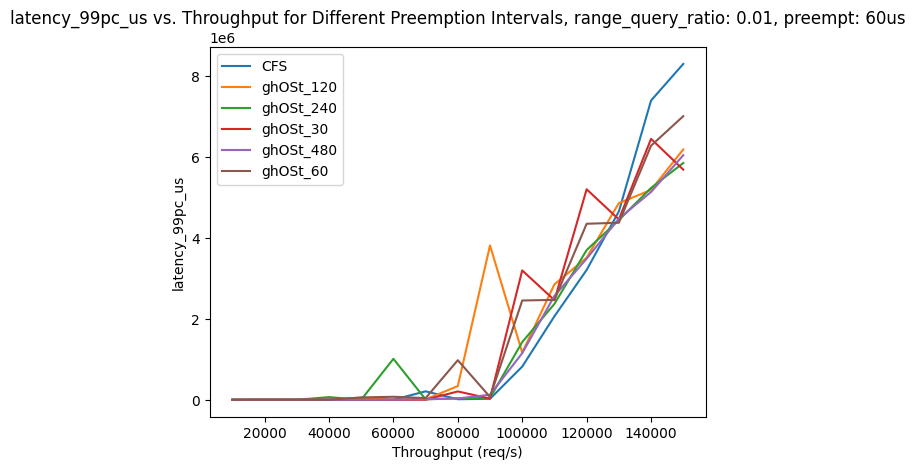

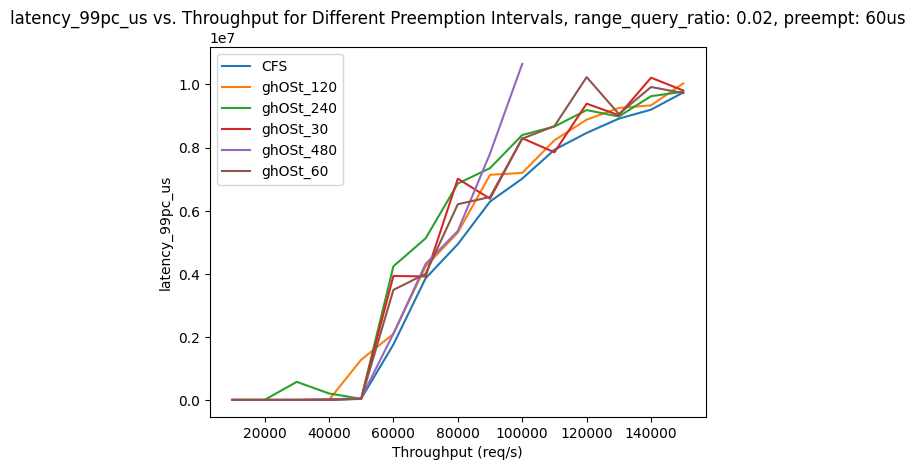

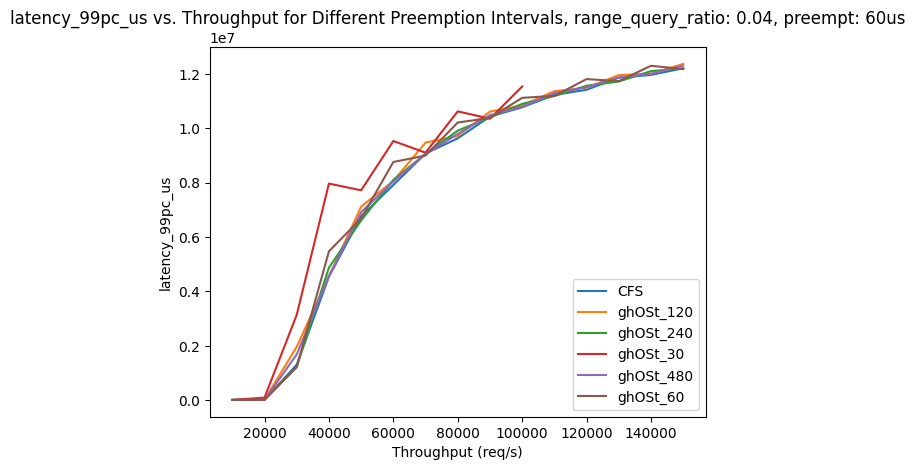

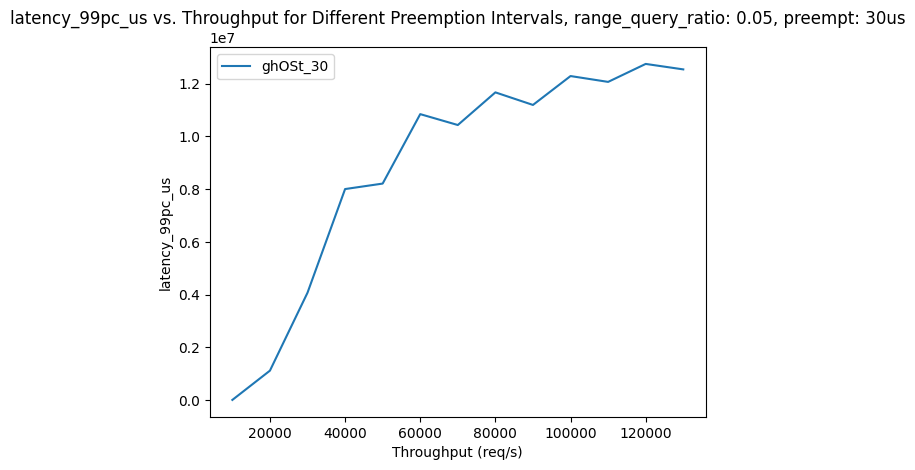

In [20]:
for key, val in diff_wkld_dict.items():
    plot_preemption_stats(val, key="latency_99pc_us") # latency_99pc_us latency_99_9pc_us